# Finite difference method

In numerical analysis, finite-difference methods (FDM) are widely used for the solution of differential equations and are based on the idea of approximating the derivative terms with finite differences. This method was propably one of the first approaches to the numerical solution of PDEs. 

The stencils used in FDM are derived from Taylor series. The Taylor series of a real or complex-valued function $f(x)$ that is infinitely differentiable at a real or complex number $a$ is the power series 

>$f(a) = \sum_{n=0}^{\infty}\frac{f^{(n)}(a)}{n\!}(x-a)^{n}$

where $f^{(n)}(a)$ denotes the *n*th derivative of $f$ evaluated at the point $a$. The derivative of order zero of $f$ is defined to be $f$ itself and $(x − a)^{0}$ and $0\!$  are both defined to be 1.

A finite difference is a mathematical expression of the form $f(x + b) − f (x + a)$. 

Commonly the following types are considered: 

The forward difference 

>$\Delta_{h}[f](x)=f(x+h)-f(x)$,

the backward difference 

>$\nabla_{h}[f](x)=f(x)-f(x-h)$,

and finally the central differences 

>$\delta_{h}[f](x)=f(x+\frac{1}{2}h)-f(x-\frac{1}{2}h)$.

But, what about their relation with the derivatives? The derivative of a function $f$ at a point $x$ is defined by the limit

>$f'(x) = \lim_{h \to 0} \frac{f(x+h)-f(x)}{h}$.

For non-zero values of $h$ as we approach to zero

>$f'(x) = \lim_{h \to 0} \frac{\Delta_{h}[f](x)}{h}$.

Hence, the forward difference divided by $h$ approximates the derivative when $h$ is small. The error in this approximation can be derived from Taylor's theorem.

Consider the following ordinary differential equation with boundary conditions in $x\in[0,1]$

> $ u'(x) = 3u(x) + 2$

> $u(x=0) = 1/3$

Using the Euler method or the forward difference scheme we approximate

> $ u'(x) \approx \frac{u(x+h) - u(x)}{h}$

A discretized form of the ODE is 

> $ u(x+h) = (1+3h)u(x) + 2h$

The last equation can be used to numerically solve the problem.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# we begin with the domain discretization
a, b = 0.0, 1.0
N = 1000
xi=np.linspace(a,b,N)

# define the step
h = xi[1]-xi[0]


In [3]:
#print(xi, a, b)
#print(h)
#print(len(xi))

In [4]:
# initialize the arrays
A = np.zeros((N,N))
b = np.zeros((N,1))
#print(A)
#print(b)

In [5]:
# preview the range content
#print(list(range(0,N)))

In [6]:
A[0][0] = 1
b[0] = 1/3
for ii in range(1,N): #for each row
    b[ii] = -2*h
    for jj in range(0, N): #for each column
        if (jj == ii-1):
            A[ii][jj] = (1+3*h)
        elif (jj == ii):
            A[ii][jj] = -1
        
#print(A)
#print(b)

In [7]:
#solve linear system
ui = np.linalg.solve(A, b)
#print(xi)

Text(0, 0.5, 'ui(x)')

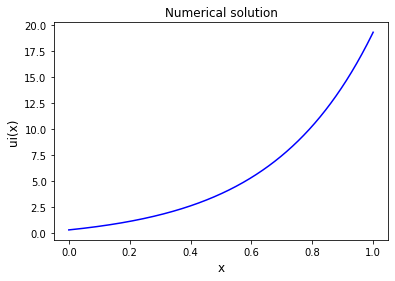

In [8]:
plt.plot(xi, ui, 'b')
plt.title('Numerical solution')
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.xlabel('x')
plt.ylabel('ui(x)')

The analytic solution for this ODE is the following

> $u(x) = c_{1}e^{3x}-2/3$

> $ c_{1} = 1, u(x=0) = 1/3$

Text(0, 0.5, 'u(x)')

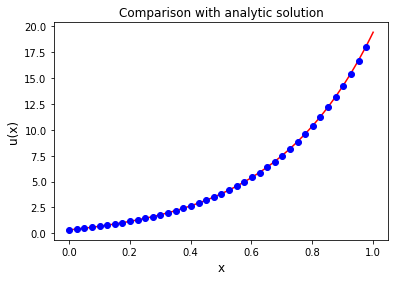

In [9]:
# comparison with analytic solution
xx = np.linspace(0,1.0,100)
c1 = 1
# change resolution for plot
ux = c1*np.exp(3*xx)-2/3
plt.plot(xx, ux, 'r')

# the discretization is small and the dots in the figure would be too dense!
if N>100:
    plt.plot(xi[1:len(xi):25], ui[1:len(ui):25], 'bo')
else:
    plt.plot(xi, ui, 'bo')
    
plt.title('Comparison with analytic solution')
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.xlabel('x')
plt.ylabel('u(x)')